In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrames
data1 = pd.read_csv('backup/genomic+annotation/metadata/combined_metadata.csv')
data1['category'] = 'genomic+annotation'

data2 = pd.read_csv('backup/genomic+assembly/metadata/combined_metadata.csv')
data2['category'] = 'genomic+assembly'

data3 = pd.read_csv('backup/assembly+genome/metadata/combined_metadata.csv')
data3['category'] = 'genomic+assembly'

data4 = pd.read_csv('backup/genomic+variant+calling/metadata/combined_metadata.csv')
data4['category'] = 'genomic+variant+calling'

data5 = pd.read_csv('backup/variant+calling/metadata/combined_metadata.csv')
data5['category'] = 'genomic+variant+calling'

data6 = pd.read_csv('backup/rna-seq/metadata/combined_metadata.csv')
data6['category'] = 'rna-seq'

data7 = pd.read_csv('backup/epigenetics/metadata/combined_metadata.csv')
data7['category'] = 'epigenetics'

data8 = pd.read_csv('backup/phylogenetic/metadata/combined_metadata.csv')
data8['category'] = 'phylogenetic'

# Combine all DataFrames into a single DataFrame
combined_data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], ignore_index=True)
print(len(combined_data))

# Group by 'full_name' and aggregate the 'category' into a list
grouped_data = combined_data.groupby('full_name', as_index=False).agg({
    'category': lambda x: ', '.join(sorted(set(x))),  # Convert list to a sorted, unique, comma-separated string
    **{col: 'first' for col in combined_data.columns if col != 'category'}
})
print(len(grouped_data))

backup_dir = 'backup/'

# Initialize empty lists to hold the DataFrames
contributor_dfs = []
commit_dfs = []
subscriber_dfs = []
release_dfs = []
issue_dfs = []
pull_dfs = []

# Iterate through each folder in the backup directory
for folder_name in os.listdir(backup_dir):
    folder_path = os.path.join(backup_dir, folder_name)
    
    # Check if it's a directory and contains 'contributors', 'commits', or 'subscribers' folders
    if os.path.isdir(folder_path):
        contributors_dir = os.path.join(folder_path, 'contributors')
        commits_dir = os.path.join(folder_path, 'commits')
        subscribers_dir = os.path.join(folder_path, 'subscribers')
        releases_dir = os.path.join(folder_path, 'releases')
        issues_dir = os.path.join(folder_path, 'issues')
        pulls_dir = os.path.join(folder_path, 'pulls')
        
        # Process contributors
        if os.path.exists(contributors_dir):
            for file_name in os.listdir(contributors_dir):
                file_path = os.path.join(contributors_dir, file_name)
                if file_name.endswith('.csv'):
                    try:
                        contributor_df = pd.read_csv(file_path)
                        if not contributor_df.empty:
                            contributor_dfs.append(contributor_df)
                    except pd.errors.EmptyDataError:
                        pass
        
        # Process commits
        if os.path.exists(commits_dir):
            for file_name in os.listdir(commits_dir):
                file_path = os.path.join(commits_dir, file_name)
                if file_name.endswith('.csv'):
                    try:
                        commit_df = pd.read_csv(file_path)
                        if not commit_df.empty:
                            commit_dfs.append(commit_df)
                    except pd.errors.EmptyDataError:
                        pass
        
        # Process subscribers
        if os.path.exists(subscribers_dir):
            for file_name in os.listdir(subscribers_dir):
                file_path = os.path.join(subscribers_dir, file_name)
                if file_name.endswith('.csv'):
                    try:
                        subscriber_df = pd.read_csv(file_path)
                        if not subscriber_df.empty:
                            subscriber_dfs.append(subscriber_df)
                    except pd.errors.EmptyDataError:
                        pass

        if os.path.exists(releases_dir):
            for file_name in os.listdir(releases_dir):
                file_path = os.path.join(releases_dir, file_name)
                if file_name.endswith('.csv'):
                    try:
                        release_df = pd.read_csv(file_path)
                        release_df['file_name']= file_name
                        if not release_df.empty:
                            release_dfs.append(release_df)
                    except pd.errors.EmptyDataError:
                        pass
        
        # Process issues
        if os.path.exists(issues_dir):
            for file_name in os.listdir(issues_dir):
                file_path = os.path.join(issues_dir, file_name)
                if file_name.endswith('.csv'):
                    try:
                        issue_df = pd.read_csv(file_path)
                        issue_df['file_name']= file_name
                        if not issue_df.empty:
                            issue_dfs.append(issue_df)
                    except pd.errors.EmptyDataError:
                        pass
        
        # Process pulls
        if os.path.exists(pulls_dir):
            for file_name in os.listdir(pulls_dir):
                file_path = os.path.join(pulls_dir, file_name)
                if file_name.endswith('.csv'):
                    try:
                        pull_df = pd.read_csv(file_path)
                        pull_df['file_name']= file_name
                        if not pull_df.empty:
                            pull_dfs.append(pull_df)
                    except pd.errors.EmptyDataError:
                        pass

# Combine all the DataFrames into one for each type
if contributor_dfs:
    combined_contributors_df = pd.concat(contributor_dfs, ignore_index=True)
else:
    combined_contributors_df = pd.DataFrame()

if commit_dfs:
    combined_commits_df = pd.concat(commit_dfs, ignore_index=True)
else:
    combined_commits_df = pd.DataFrame()

if subscriber_dfs:
    combined_subscribers_df = pd.concat(subscriber_dfs, ignore_index=True)
else:
    combined_subscribers_df = pd.DataFrame()

if release_dfs:
    combined_releases_df = pd.concat(release_dfs, ignore_index=True)
else:
    combined_releases_df = pd.DataFrame()

if issue_dfs:
    combined_issues_df = pd.concat(issue_dfs, ignore_index=True)
else:
    combined_issues_df = pd.DataFrame()

if pull_dfs:
    combined_pulls_df = pd.concat(pull_dfs, ignore_index=True)
else:
    combined_pulls_df = pd.DataFrame()

    
def extract_repo_info(file_name):
    parts = file_name.split('.csv')[0].split('++')
    if len(parts) >= 5:  # Check if URL has enough parts
        repo_owner = parts[0]
        repo_name = parts[1]
        return repo_owner, repo_name
    else:
        return None, None

# Apply the function to the DataFrame
combined_issues_df[['repo_owner', 'repo_name']] = combined_issues_df['file_name'].apply(
    lambda url: pd.Series(extract_repo_info(url))
)
combined_pulls_df[['repo_owner', 'repo_name']] = combined_pulls_df['file_name'].apply(
    lambda url: pd.Series(extract_repo_info(url))
)
combined_releases_df[['repo_owner', 'repo_name']] = combined_releases_df['file_name'].apply(
    lambda url: pd.Series(extract_repo_info(url))
)

# Add 'full_name' column to each DataFrame
combined_contributors_df['full_name'] = combined_contributors_df['repo_owner'] + '/' + combined_contributors_df['repo_name']
combined_commits_df['full_name'] = combined_commits_df['repo_owner'] + '/' + combined_commits_df['repo_name']
combined_subscribers_df['full_name'] = combined_subscribers_df['repo_owner'] + '/' + combined_subscribers_df['repo_name']
combined_issues_df['full_name'] = combined_issues_df['repo_owner'] + '/' + combined_issues_df['repo_name']
combined_pulls_df['full_name'] = combined_pulls_df['repo_owner'] + '/' + combined_pulls_df['repo_name']
combined_releases_df['full_name'] = combined_releases_df['repo_owner'] + '/' + combined_releases_df['repo_name']

# Group by 'full_name' and convert to a dictionary of lists for contributors, commits, and subscribers
contributors_dict = combined_contributors_df.groupby('full_name').apply(lambda x: x.to_dict('records')).to_dict()
commits_dict = combined_commits_df.groupby('full_name').apply(lambda x: x.to_dict('records')).to_dict()
subscribers_dict = combined_subscribers_df.groupby('full_name').apply(lambda x: x.to_dict('records')).to_dict()
releases_dict = combined_releases_df.groupby('full_name').apply(lambda x: x.to_dict('records')).to_dict()
issues_dict = combined_issues_df.groupby('full_name').apply(lambda x: x.to_dict('records')).to_dict()
pulls_dict = combined_pulls_df.groupby('full_name').apply(lambda x: x.to_dict('records')).to_dict()

# Map these dictionaries to 'grouped_data'
grouped_data['contributors_info'] = grouped_data['full_name'].map(contributors_dict)
grouped_data['commits_info'] = grouped_data['full_name'].map(commits_dict)
grouped_data['subscribers_info'] = grouped_data['full_name'].map(subscribers_dict)
grouped_data['releases_info'] = grouped_data['full_name'].map(releases_dict)
grouped_data['issues_info'] = grouped_data['full_name'].map(issues_dict)
grouped_data['pulls_info'] = grouped_data['full_name'].map(pulls_dict)

def get_total_contributors(contributors_info):
    if isinstance(contributors_info, list):
        total_contributors = len(set(contrib['contributor_login'] for contrib in contributors_info))
        total_contributions = sum(contrib['contributions'] for contrib in contributors_info)
        
        return total_contributors, total_contributions
    else:
        return 0, 0

# Total Commits and Total Unique Authors
def get_total_commits_and_authors(commits_info):
    if isinstance(commits_info, list):
        total_commits = len(commits_info)
        unique_authors = len(set(commit['commit_author'] for commit in commits_info if 'commit_author' in commit))
        
        return total_commits, unique_authors
    else:
        return 0, 0
    
def get_total_subscribers(subscribers_info):
    if isinstance(subscribers_info, list):
        # Count total subscribers
        total_subscribers = len(subscribers_info)
        return total_subscribers
    else:
        return 0
    
def get_total_releases(releases_info):
    if isinstance(releases_info, list):
        return len(releases_info)
    else:
        return 0

def get_total_issues(issues_info):
    if isinstance(issues_info, list):
        return len(issues_info)
    else:
        return 0

def get_total_pulls(pulls_info):
    if isinstance(pulls_info, list):
        return len(pulls_info)
    else:
        return 0

grouped_data[['total_contributors', 'total_contributions']] = grouped_data['contributors_info'].apply(lambda x: pd.Series(get_total_contributors(x)))
grouped_data[['total_commits', 'total_authors']] = grouped_data['commits_info'].apply(lambda x: pd.Series(get_total_commits_and_authors(x)))
grouped_data['total_subscribers'] = grouped_data['subscribers_info'].apply(get_total_subscribers)
grouped_data['total_releases'] = grouped_data['releases_info'].apply(get_total_releases)
grouped_data['total_issues'] = grouped_data['issues_info'].apply(get_total_issues)
grouped_data['total_pulls'] = grouped_data['pulls_info'].apply(get_total_pulls)


expanded_data = grouped_data.copy()
expanded_data['category'] = expanded_data['category'].str.split(', ')
expanded_data = expanded_data.explode('category')
print(len(expanded_data))


3364
3276


C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_26816\1530881367.py:203: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_26816\1530881367.py:204: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_26816\1530881367.py:205: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated

3330


## Popularity Workflows Descriptive
### Objective: Evaluate the popularity (e.g., stars, forks, subscribers) of repositories within each category to identify which clusters contain the most active or popular workflows.

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_26816\2696493148.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_26816\2696493148.py:24: UserWarning:


The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.



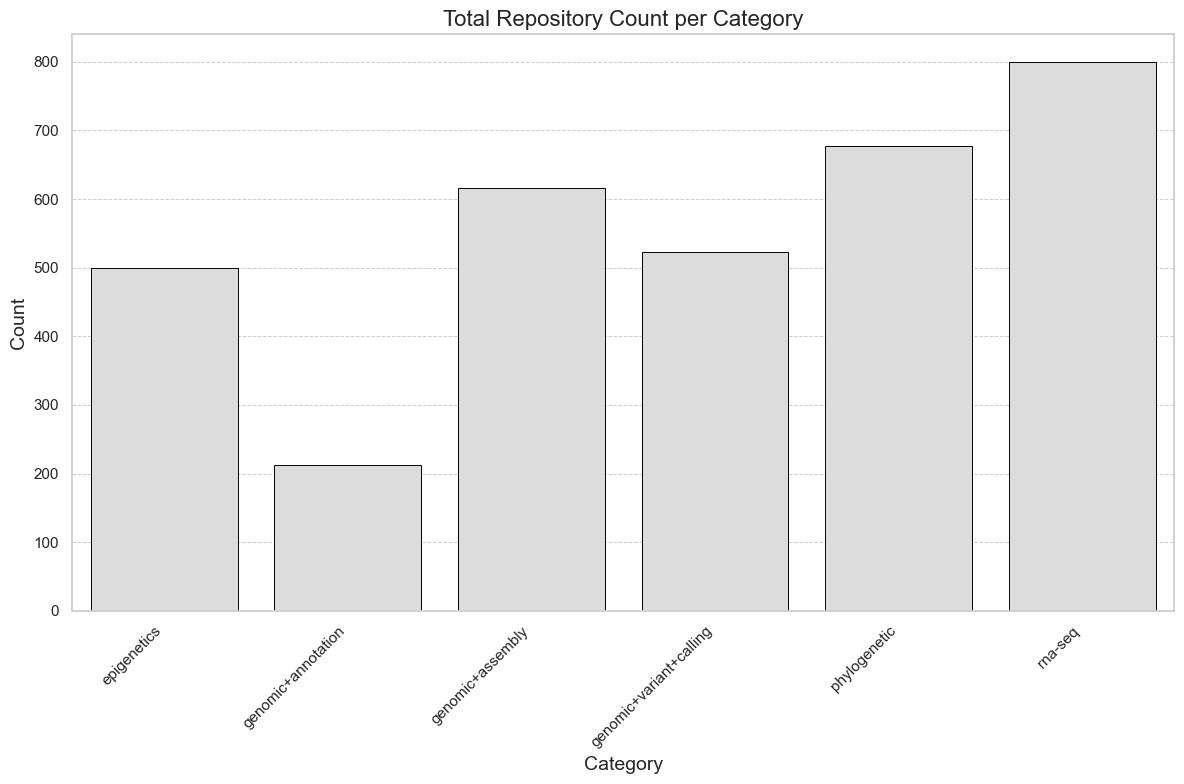

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `category_summary` is already defined and processed
category_summary = expanded_data.groupby('category').agg(
    repo_count=('full_name', 'count')  # Count the number of repositories
).reset_index()

# Melting the DataFrame for seaborn
melted_df = category_summary.melt(id_vars='category', 
                                  value_vars=['repo_count'],
                                  var_name='metric', 
                                  value_name='value')
# Filter the melted DataFrame to include only the repository count
count_df = melted_df[melted_df['metric'] == 'repo_count']

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 1)  # Single color for repository count

# Create the bar plot for repository count
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='category', y='value', data=count_df, palette=palette, edgecolor='black', linewidth=0.7)

# Add labels and title
plt.title('Total Repository Count per Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees, align text to the right

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [278]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample DataFrame setup (replace with your actual DataFrame)
# Assuming expanded_data is already defined

# Define metrics to plot
metrics = ['stargazers_count', 'forks_count', 'total_contributors', 'total_authors', 'total_contributions', 'total_commits']

# Get unique categories from the DataFrame
categories = sorted(expanded_data['category'].unique())

# Create subplots with 2 columns
fig = make_subplots(
    rows=len(metrics), 
    cols=len(categories), 
    # subplot_titles=[f"{metric}" for metric in metrics for category in categories],
    #vertical_spacing=0.1, 
    #horizontal_spacing=0.1
)

# Colors for boxplot components
box_color = 'lightcoral'
whisker_color = 'black'
cap_color = 'grey'

# Add boxplots for each metric and category
for i, metric in enumerate(metrics):
    for j, category in enumerate(categories):
        row = i + 1
        col = j + 1
        data = expanded_data[expanded_data['category'] == category][metric]

        fig.add_trace(
            go.Box(
                y=data,
                name=category,
                marker=dict(color=box_color),
                line=dict(color=whisker_color),
                boxmean=None,  # No mean line
                showwhiskers=True,
                #boxpoints=False
            ),
            row=row, col=col
        )

# Update layout for the plot
fig.update_layout(
    title_text='Distribution of Metrics per Category',
    title_x=0.5,
    height=1500,
    width=1200,
    showlegend=False
)

# Update axis labels
for i in range(len(metrics)):
    fig.update_yaxes(title_text=f'{metrics[i]}', row=i + 1, col=1)
for j in range(len(categories)):
    fig.update_xaxes(title_text='Category', row=len(metrics), col=j + 1)

# Display the plot
fig.show()


In [279]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample DataFrame setup (replace with your actual DataFrame)
# Assuming expanded_data is already defined

# Aggregate the data for each subplot
category_summary_repos = expanded_data.groupby('category').agg(
    total_repos=('id', 'count')  # Assuming 'id' is unique for each repository
).reset_index().sort_values('total_repos', ascending=False)

category_summary_stars = expanded_data.groupby('category').agg(
    total_stars=('stargazers_count', 'sum')
).reset_index().sort_values('total_stars', ascending=False)

category_summary_forks = expanded_data.groupby('category').agg(
    total_forks=('forks_count', 'sum')
).reset_index().sort_values('total_forks', ascending=False)

category_summary_contrib_authors = expanded_data.groupby('category').agg(
    total_contributors=('total_contributors', 'sum'),
    total_authors=('total_authors', 'sum')
).reset_index().sort_values('total_contributors', ascending=False)

category_summary_commits_contribs = expanded_data.groupby('category').agg(
    total_commits=('total_commits', 'sum'),
    total_contributions=('total_contributions', 'sum')
).reset_index().sort_values('total_commits', ascending=False)

category_summary_pulls = expanded_data.groupby('category').agg(
    total_pulls=('total_pulls', 'sum')
).reset_index().sort_values('total_pulls', ascending=False)

# Create subplots with 2x2 layout
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        'Total Repositories per Category',
        'Total Stars and Forks per Category',
        'Total Contributors and Authors per Category',
        'Total Commits and Contributions per Category'
    ]
)

# Define colors for each bar plot
colors = {
    'repos': 'deepskyblue',
    'stars': 'mediumseagreen',
    'forks': 'lightcoral',
    'contributors': 'dodgerblue',
    'authors': 'lightpink',
    'commits': 'plum',
    'contributions': 'lightsalmon',
}

# Add bar plot for Total Repositories per Category
fig.add_trace(
    go.Bar(
        x=category_summary_repos['category'],
        y=category_summary_repos['total_repos'],
        name='Total Repositories',
        marker_color=colors['repos']
    ),
    row=1, col=1
)

# Add bar plots for Total Stars and Forks per Category
fig.add_trace(
    go.Bar(
        x=category_summary_stars['category'],
        y=category_summary_stars['total_stars'],
        name='Total Stars',
        marker_color=colors['stars']
    ),
    row=1, col=2
)
fig.add_trace(
    go.Bar(
        x=category_summary_forks['category'],
        y=category_summary_forks['total_forks'],
        name='Total Forks',
        marker_color=colors['forks']
    ),
    row=1, col=2
)

# Add bar plots for Total Contributors and Authors per Category
fig.add_trace(
    go.Bar(
        x=category_summary_contrib_authors['category'],
        y=category_summary_contrib_authors['total_contributors'],
        name='Total Contributors',
        marker_color=colors['contributors']
    ),
    row=2, col=1
)
fig.add_trace(
    go.Bar(
        x=category_summary_contrib_authors['category'],
        y=category_summary_contrib_authors['total_authors'],
        name='Total Authors',
        marker_color=colors['authors']
    ),
    row=2, col=1
)

# Add bar plots for Total Commits and Contributions per Category
fig.add_trace(
    go.Bar(
        x=category_summary_commits_contribs['category'],
        y=category_summary_commits_contribs['total_commits'],
        name='Total Commits',
        marker_color=colors['commits']
    ),
    row=2, col=2
)
fig.add_trace(
    go.Bar(
        x=category_summary_commits_contribs['category'],
        y=category_summary_commits_contribs['total_contributions'],
        name='Total Contributions',
        marker_color=colors['contributions']
    ),
    row=2, col=2
)


# Update layout for the plot
fig.update_layout(
    title_text='Aggregated Metrics per Category',
    title_x=0.5,
    height=1000,
    width=1200,
    showlegend=True,
    barmode='group',  # Group bars by category
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Display the plot
fig.show()



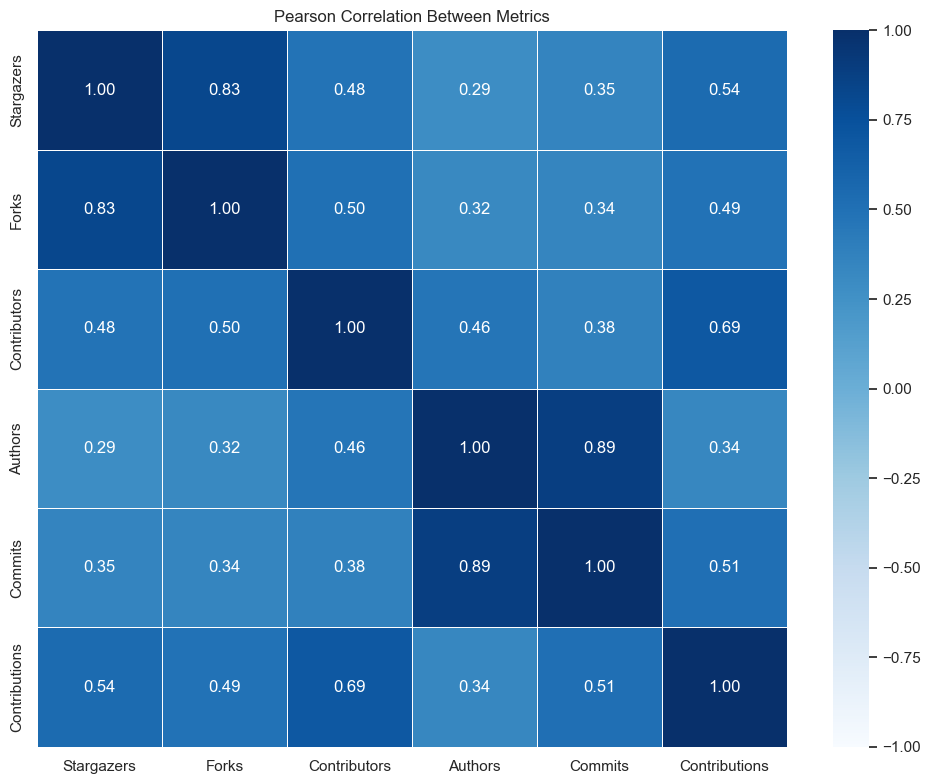

In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Prepare the data (Replace `expanded_data` with your actual DataFrame)
# Ensure the relevant columns are in the DataFrame
data = expanded_data[['stargazers_count', 'forks_count', 'total_contributors', 'total_authors', 'total_commits', 'total_contributions']]

# Fit and transform the data using PowerTransformer
transformer = PowerTransformer()

# Applying the transformer to each column and creating a new DataFrame
normalized_data = transformer.fit_transform(data)

# Create a DataFrame using normalized data
df_normalized = pd.DataFrame(
    normalized_data,
    columns=['Stargazers', 'Forks', 'Contributors', 'Authors', 'Commits', 'Contributions']
)

# Calculate the Pearson correlation matrix
correlation_matrix = df_normalized.corr(method='pearson')

# Plotting Pearson Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Blues',  # Shades of blue color scale
    fmt=".2f",
    linewidths=.5,
    vmin=-1,
    vmax=1
)
plt.title('Pearson Correlation Between Metrics')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


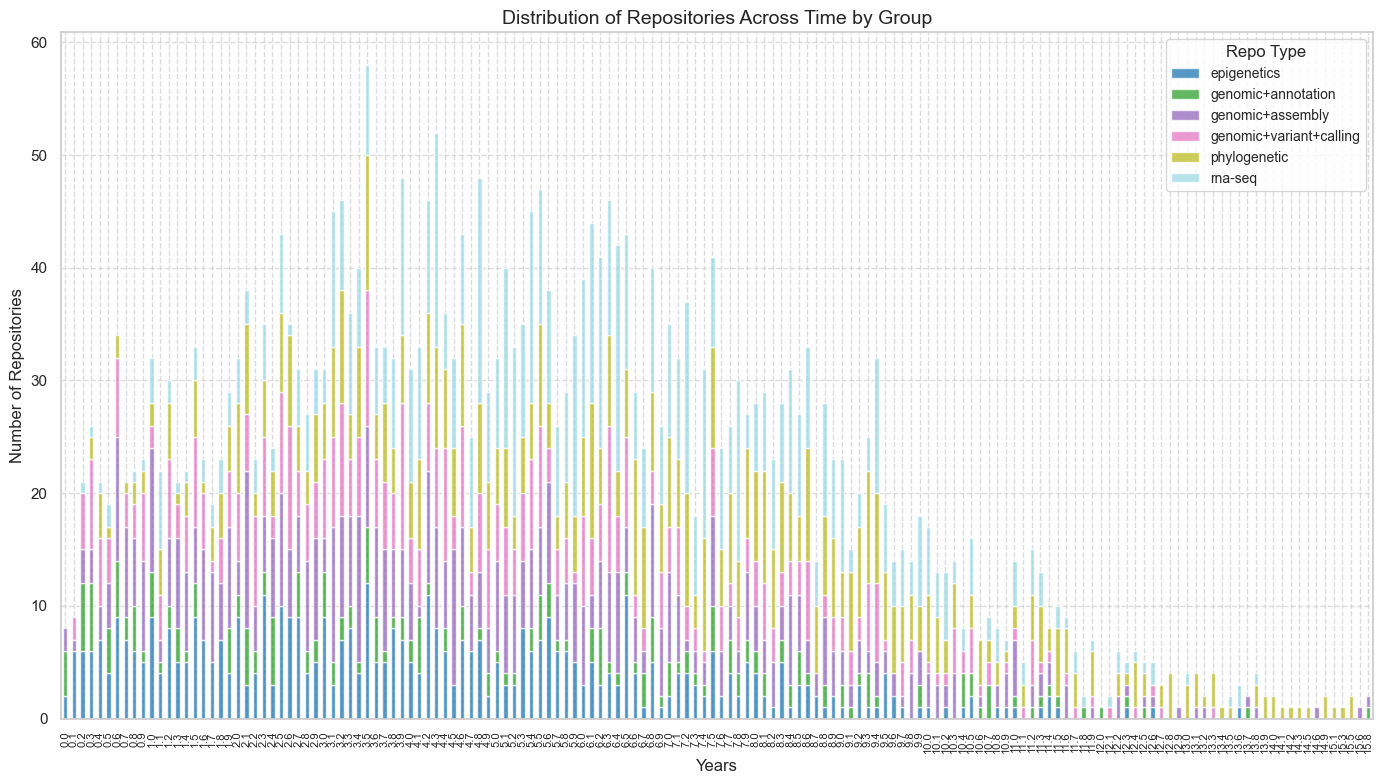

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'created_at' to datetime, localize or convert timezones if needed
expanded_data['created_at'] = pd.to_datetime(expanded_data['created_at'])
expanded_data['created_at'] = expanded_data['created_at'].dt.tz_localize(None)

# Calculate the age of each repo in days and years
today = datetime.now()
expanded_data['old_days'] = (today - expanded_data['created_at']).dt.days
expanded_data['old_years'] = round(expanded_data['old_days'] / 365.25, 1)

# Group by age in years and repo type, then count occurrences
cluster_group_counts = expanded_data.groupby(['old_years', 'category']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))  # Adjusted figure size

# Create a stacked bar plot
cluster_group_counts.plot(kind='bar', stacked=True, ax=ax, alpha=0.75, colormap='tab20')

# Add vertical line to mark a specific point (e.g., 4 years)
#ax.axvline(x=4.3, color='red', linestyle='--', linewidth=2, label='4-Year Mark')

# Customize plot
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Repositories', fontsize=12)
plt.title('Distribution of Repositories Across Time by Group', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=8, rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Repo Type', loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels and titles

# Show plot
plt.show()


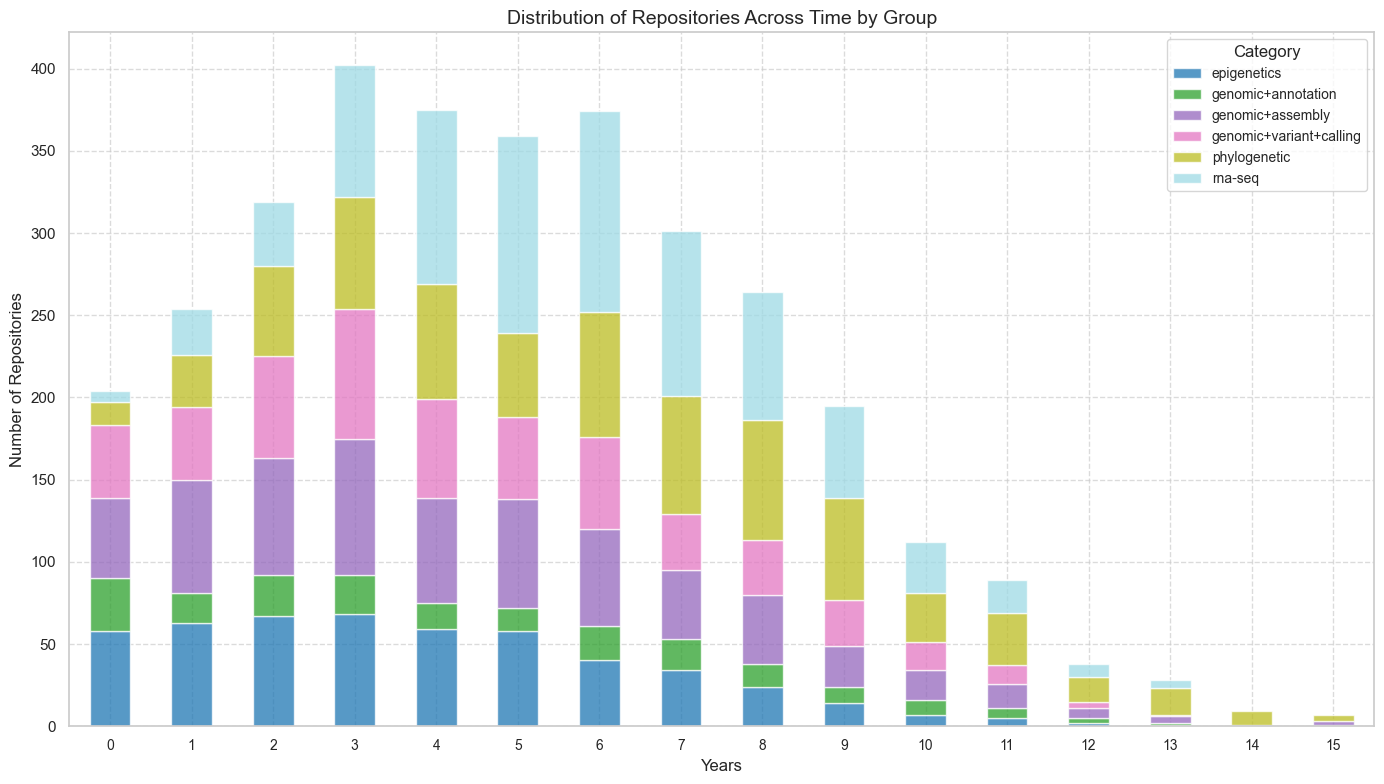

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'created_at' to datetime, localize or convert timezones if needed
expanded_data['created_at'] = pd.to_datetime(expanded_data['created_at'])
expanded_data['created_at'] = expanded_data['created_at'].dt.tz_localize(None)

# Calculate the age of each repo in days and years
today = datetime.now()
expanded_data['old_days'] = (today - expanded_data['created_at']).dt.days
expanded_data['old_years'] = round(expanded_data['old_days'] / 365.25, 1)

# Convert 'old_years' to integer for categorical x-axis
expanded_data['old_years'] = expanded_data['old_years'].astype(int)

# Group by age in years and repo type, then count occurrences
cluster_group_counts = expanded_data.groupby(['old_years', 'category']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))  # Adjusted figure size

# Create a stacked bar plot
cluster_group_counts.plot(kind='bar', stacked=True, ax=ax, alpha=0.75, colormap='tab20')

# Customize x-axis to show discrete year labels
ax.set_xticks(range(len(cluster_group_counts.index)))
ax.set_xticklabels(cluster_group_counts.index, rotation=0, fontsize=10)  # Set x-tick labels

# Optionally, add a vertical line
# ax.axvline(x=4, color='red', linestyle='--', linewidth=2, label='4-Year Mark')

# Customize plot
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Repositories', fontsize=12)
plt.title('Distribution of Repositories Across Time by Group', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category', loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to fit labels and titles

# Show plot
plt.show()
